# TSFoil 
## Introduction

TSFoil is a "Transonic Small Disturbance" airfoil code.
The original Fortran 77 code was downloaded from Prof William Mason's software collection below
http://www.dept.aoe.vt.edu/~mason/Mason_f/MRsoft.html#TSFOIL2

Formal user manuals can be downloaded from:    
http://www.dept.aoe.vt.edu/~mason/Mason_f/TSFOIL2man.pdf
https://ntrs.nasa.gov/api/citations/19790004836/downloads/19790004836.pdf

## How to

For windows, the given tsfoil.exe file should work fine without any modifications.    
For Linux, or any other fortran sorce modifications, simple compilation with gfortran would work.

```bash
gfortran -o tsfoil.exe tsfoil.f90
gfortran -o tsfoil tsfoil.f90
```
Easiest way to get TSfoil work, would be to call the program tsfoil.py through command prompt.   
You can contain the code in three backslashes backticks. If you specify the language in the beginning it will also color code as usual.


```bash
python -i tsfoil.py
```

Or else, it can be imported as a module shown here in this notebook

## Typical session
 

In [1]:
from tsfoil import Tsfoil
import numpy as np
tsfoil = Tsfoil()

Once the module is loaded as shown above, an airfoil has to be loaded and typical parameters has to be set such as Mach number, angle of attack etc. In this particular version, ICUT parameter shouldnt be used for grid refinement. For any modern computer this should not cause any problem as well. Most cases I have tried so far converged within a second to few seconds max.

In [2]:
tsfoil.load("rae2822.dat")  # Load the airfoil rae2822.dat - File format is typical xfoil dat format
tsfoil.set({"alpha": 0.0})  # Set AoA to 0.0
tsfoil.exec("EMACH", 0.75)  # execute the case with free stream mach number 0.75

Once a case is run, a set of ".out" files will be generated in the current folder.

```code
cnvg.out        : contains convergence infomation        
cpmp.out        : contains pressure coeficcient map     
cpxs.out        : contains surface pressure coeficcient       
mesh.out        : contains mesh x,y cordinates     
mmap.out        : contains mach map    
smry.out        : contains summary such as CL, CM etc        
tsfoil2.out     : contains the standard tsfoil log    
```
all these information will be absorbed in to a dataframe called buffer and each run-case will correspond to an entry in the buffer

In [3]:
tsfoil.buffer

,airfoil,mach,delta,alpha,k,doublet strength,cpfact,cdfact,cmfact,clfact,...,mesh_y,x_c,cp_up,m_up,cp_low,m_low,iter,error,mach_map,cp_map
1,rae2822.dat,0.75,0.115,0.0,2.466711,0.67698,0.293429,0.033744,0.293429,0.293429,...,"[5.2, 4.4, 3.6, 3.0, 2.4, 1.95, 1.6, 1.35, 1.1...","[-1.075, -0.95, -0.825, -0.7, -0.575, -0.45, -...","[0.02562, 0.02961, 0.0346, 0.04206, 0.0534, 0....","[0.7375, 0.7355, 0.7331, 0.7294, 0.7237, 0.715...","[0.02562, 0.02961, 0.0346, 0.04206, 0.0534, 0....","[0.7375, 0.7355, 0.7331, 0.7294, 0.7237, 0.715...","[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....","[0.01361, 0.01399, 0.01891, 0.007761, 0.005536...","[[0.759533703327, 0.759836375713, 0.7601282000...","[[-0.019841199741, -0.020475206897, -0.0210867..."


Grid layout, Cp-x distrubution, local mach number distribution, mach and Cp Contour plots can be examined as below

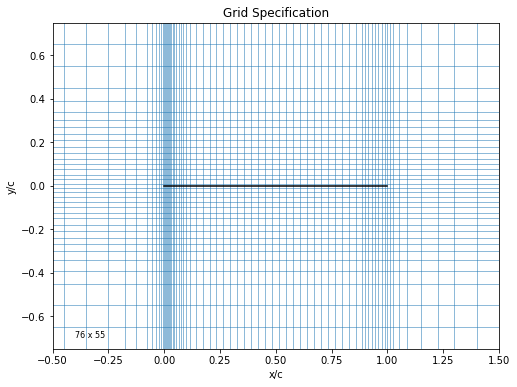

In [4]:
tsfoil.plot_grid()

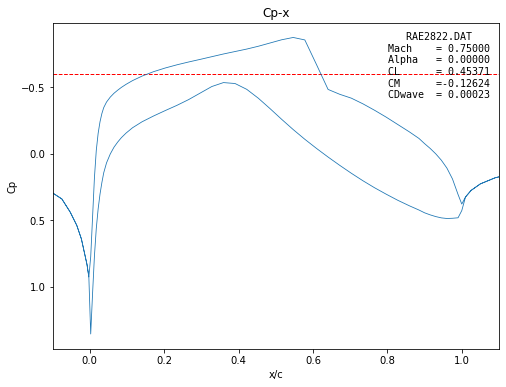

In [5]:
tsfoil.plot_cpx()

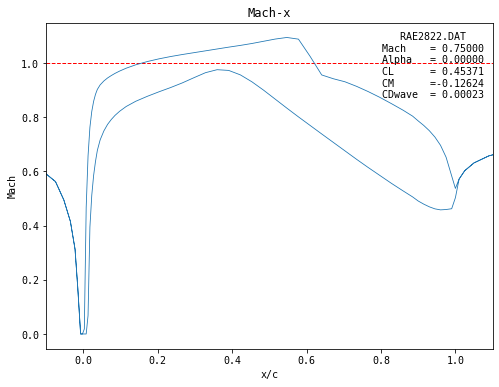

In [6]:
tsfoil.plot_machx()

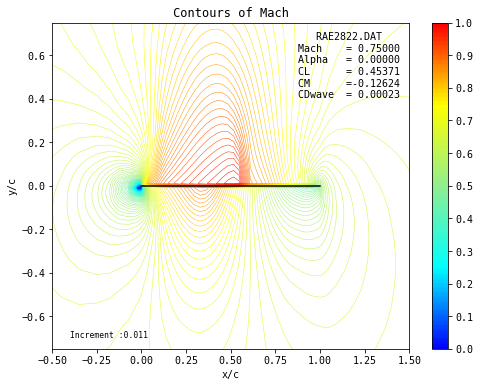

In [7]:
tsfoil.plot_isomach()

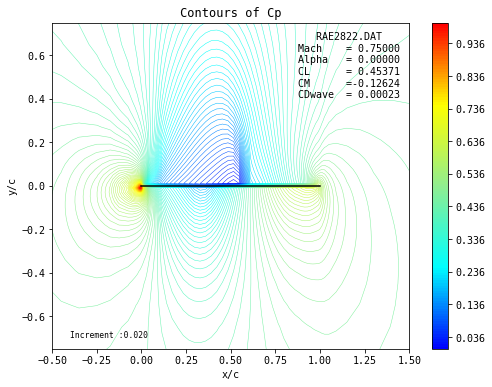

In [8]:
tsfoil.plot_isocp()

In [9]:
import pandas as pd
tsfoil.buffer=pd.DataFrame()

Just like a single case shown above, TSFoil can be used to examine AoA or Mach Sweeps etc as below   
For example to sweep free stream mach number from 0.5 to 0.9 we can execute:

In [10]:
for m in np.arange(0.5, 1.0, 0.025):
    tsfoil.exec("EMACH", m)

In [11]:
tsfoil.buffer.head()

,airfoil,mach,delta,alpha,k,doublet strength,cpfact,cdfact,cmfact,clfact,...,mesh_y,x_c,cp_up,m_up,cp_low,m_low,iter,error,mach_map,cp_map
1,rae2822.dat,0.500,0.115,0.0,6.342971,0.67698,0.397714,0.045737,0.397714,0.397714,...,"[5.2, 4.4, 3.6, 3.0, 2.4, 1.95, 1.6, 1.35, 1.1...","[-1.075, -0.95, -0.825, -0.7, -0.575, -0.45, -...","[0.0116, 0.01476, 0.0186, 0.02418, 0.03259, 0....","[0.4958, 0.4947, 0.4933, 0.4913, 0.4882, 0.483...","[0.0116, 0.01476, 0.0186, 0.02418, 0.03259, 0....","[0.4958, 0.4947, 0.4933, 0.4913, 0.4882, 0.483...","[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....","[0.007863, 0.006364, 0.01612, 0.004002, 0.0032...","[[0.504186272621, 0.504267394543, 0.5043438673...","[[-0.011783273891, -0.012012558058, -0.0122287..."
1,rae2822.dat,0.525,0.115,0.0,5.834526,0.67698,0.383424,0.044094,0.383424,0.383424,...,"[5.2, 4.4, 3.6, 3.0, 2.4, 1.95, 1.6, 1.35, 1.1...","[-1.075, -0.95, -0.825, -0.7, -0.575, -0.45, -...","[0.01196, 0.01515, 0.01902, 0.02466, 0.03315, ...","[0.5206, 0.5194, 0.5179, 0.5158, 0.5126, 0.507...","[0.01196, 0.01515, 0.01902, 0.02466, 0.03315, ...","[0.5206, 0.5194, 0.5179, 0.5158, 0.5126, 0.507...","[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....","[0.008205, 0.006691, 0.01653, 0.004235, 0.0033...","[[0.529447555542, 0.529536545277, 0.5296207666...","[[-0.012069293298, -0.012312186882, -0.0125415..."
1,rae2822.dat,0.550,0.115,0.0,5.362694,0.67698,0.370277,0.042582,0.370277,0.370277,...,"[5.2, 4.4, 3.6, 3.0, 2.4, 1.95, 1.6, 1.35, 1.1...","[-1.075, -0.95, -0.825, -0.7, -0.575, -0.45, -...","[0.01242, 0.01563, 0.01955, 0.02525, 0.03385, ...","[0.5452, 0.544, 0.5425, 0.5402, 0.5369, 0.5318...","[0.01242, 0.01563, 0.01955, 0.02525, 0.03385, ...","[0.5452, 0.544, 0.5425, 0.5402, 0.5369, 0.5318...","[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....","[0.008563, 0.007067, 0.01694, 0.004487, 0.0035...","[[0.55473524332, 0.554833650589, 0.55492669343...","[[-0.012410522439, -0.012669629417, -0.0129146..."
1,rae2822.dat,0.575,0.115,0.0,4.922697,0.67698,0.358136,0.041186,0.358136,0.358136,...,"[5.2, 4.4, 3.6, 3.0, 2.4, 1.95, 1.6, 1.35, 1.1...","[-1.075, -0.95, -0.825, -0.7, -0.575, -0.45, -...","[0.01296, 0.01622, 0.02019, 0.02598, 0.03472, ...","[0.5698, 0.5685, 0.5669, 0.5646, 0.5611, 0.555...","[0.01296, 0.01622, 0.02019, 0.02598, 0.03472, ...","[0.5698, 0.5685, 0.5669, 0.5646, 0.5611, 0.555...","[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....","[0.008941, 0.007482, 0.01733, 0.004758, 0.0038...","[[0.580055296421, 0.580164670944, 0.5802680850...","[[-0.012815998867, -0.01309436094, -0.01335790..."
1,rae2822.dat,0.600,0.115,0.0,4.510557,0.67698,0.346885,0.039892,0.346885,0.346885,...,"[5.2, 4.4, 3.6, 3.0, 2.4, 1.95, 1.6, 1.35, 1.1...","[-1.075, -0.95, -0.825, -0.7, -0.575, -0.45, -...","[0.01362, 0.01692, 0.02097, 0.02687, 0.03578, ...","[0.5944, 0.593, 0.5914, 0.5889, 0.5852, 0.5795...","[0.01362, 0.01692, 0.02097, 0.02687, 0.03578, ...","[0.5944, 0.593, 0.5914, 0.5889, 0.5852, 0.5795...","[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....","[0.009343, 0.007943, 0.01771, 0.00505, 0.00402...","[[0.605414628983, 0.605536818504, 0.6056526899...","[[-0.013297189027, -0.013598646969, -0.0138846..."


A quick sanity check can be run with the convergence details if required as bellow

In [17]:
tsfoil.buffer["converged"].head()

1    True
1    True
1    True
1    True
1    True
Name: converged, dtype: bool

A sequence of plots can also be plotted with pseq command.   
This function can be given with a df if buffer contains too much information for example

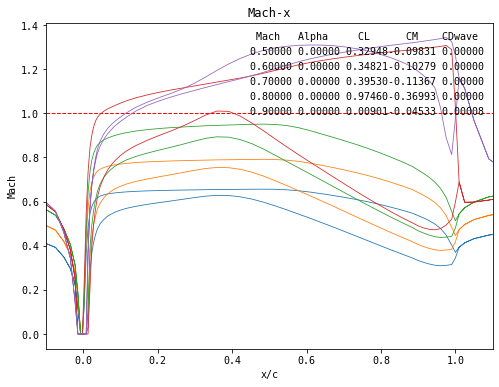

In [13]:
tsfoil.pseq_machx(tsfoil.buffer.iloc[::4])

Any two columns in the buffer can be plotted for inspection with general plot function gplot as below.
This particular example outlines the drag divergence with the increased Mach number

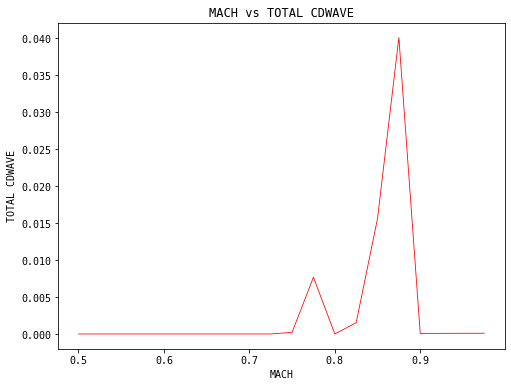

In [14]:
tsfoil.gplot("mach", "total cdwave")

For any rows containing arrays, such as the iteration history, the particular row to be examined has to be provided as well.

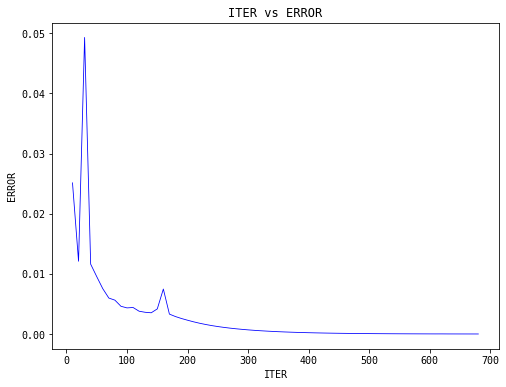

In [16]:
tsfoil.gplot("iter", "error", row=-1, color='blue')

Finally, with animate function, we can generate an animated gif file which shows either the Cp or Mach contour behavour
All the run cases are taken from the buffer.

This can be run as:
```python
tsfoil.animate(mach=False) # For Cp Contour animation
tsfoil.animate(mach=True)  # For Mach Contour animation
```

<img src="./Animate/Animation.gif"  align="left">